In [420]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import csv
import networkx as nx
#from kneed import KneeLocator
#from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [427]:
with open("global_cost_vectors_500.pk",'rb') as f:
    global_cost = pickle.load(f)
with open("local_cost_vectors.pk",'rb') as f:
    local_cost = pickle.load(f)

# Visualize with original data (2 factors : time and risk)

In [428]:
global_cost_list = []
time_list = []
risk_list = []

for k in global_cost:
    time_list.append(global_cost[k][0][0])
    risk_list.append(global_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
global_time_normalized = []
global_risk_normalized = []
for k in global_cost:
    temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    global_time_normalized.append((global_cost[k][0][0]-avgTime)/stdTime)
    global_risk_normalized.append((global_cost[k][0][1]-avgRisk)/stdRisk)
    global_cost_list.append(temp)
    


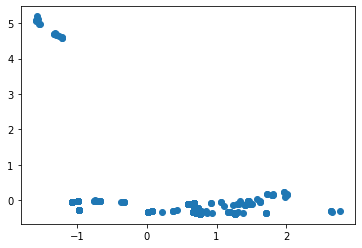

In [429]:
plt.scatter(global_time_normalized, global_risk_normalized)
plt.show()

In [430]:
len(global_time_normalized)

500

In [431]:
local_cost_list = []
time_list = []
risk_list = []

for k in local_cost:
    time_list.append(local_cost[k][0][0])
    risk_list.append(local_cost[k][0][1])
    
avgTime = np.mean(time_list)
stdTime = np.std(time_list)
avgRisk = np.mean(risk_list)
stdRisk = np.std(risk_list)
# normalized point
local_time_normalized = []
local_risk_normalized = []
for k in local_cost:
    #temp = ((global_cost[k][0][0]-avgTime)/stdTime, (global_cost[k][0][1]-avgRisk)/stdRisk)
    local_time_normalized.append((local_cost[k][0][0]-avgTime)/stdTime)
    local_risk_normalized.append((local_cost[k][0][1]-avgRisk)/stdRisk)
    local_cost_list.append(temp)

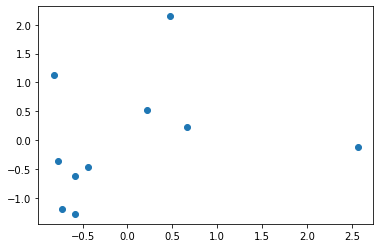

In [432]:
plt.scatter(local_time_normalized, local_risk_normalized)
plt.show()

# Visualize with ratio data (2 factors : time and risk)

In [433]:
global_ratio_list = []
ratio_list = []

for k in global_cost:
    ratio_list.append((global_cost[k][0][0]/global_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
global_Ratio_normalized = []
for e in ratio_list:
    global_ratio_list.append((e-avgRatio)/stdRatio)
    

(array([  0.,   0.,   0.,  22.,  77.,  15.,   3., 181.,  14.,  15.,  35.,
         11.,  31.,  44.,  12.,  18.,   2.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
         0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25,
         2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,
         4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,
         7.  ]),
 <BarContainer object of 36 artists>)

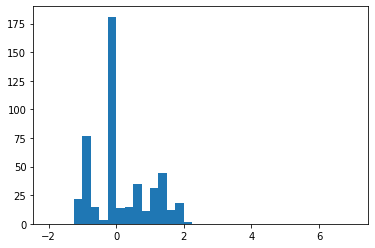

In [434]:
bins = [-2]
for i in range(36):
    bins.append(bins[-1]+0.25)
    
plt.hist(global_ratio_list,bins=bins)

In [435]:
local_ratio_list = []
ratio_list = []

for k in local_cost:
    ratio_list.append((local_cost[k][0][0]/local_cost[k][0][1]))
    
avgRatio = np.mean(ratio_list)
stdRatio = np.std(ratio_list)

# normalized point
local_Ratio_normalized = []
for e in ratio_list:
    local_ratio_list.append((e-avgRatio)/stdRatio)

(array([1., 2., 1., 2., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.]),
 array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25,  1.5 ,  1.75,  2.  ,  2.25]),
 <BarContainer object of 14 artists>)

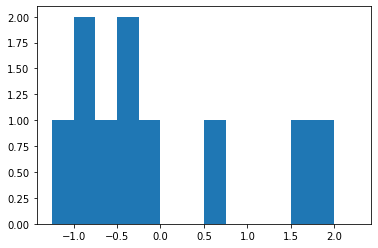

In [436]:
bins = [-1.25]
for i in range(14):
    bins.append(bins[-1]+0.25)
    
plt.hist(local_ratio_list,bins=bins)

# K means clustering based on the original features

In [437]:
kmeans = KMeans(
    init="random",
    n_clusters=5,
    n_init=10,
    max_iter=300,
    random_state=42
)


In [438]:
kmeans.fit(global_cost_list)

KMeans(init='random', n_clusters=5, random_state=42)

In [439]:
color_labels = kmeans.labels_

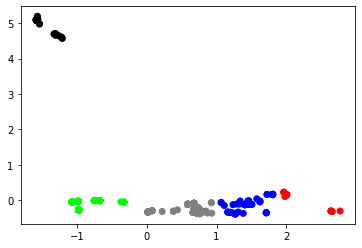

In [440]:
color = [(0.5,0.5,0.5),(1,0,0),(0,1,0),(0,0,1),(0,0,0)]
color_list = []
for ind in range(len(global_cost_list)):
    color_list.append(color[color_labels[ind]])
    
plt.scatter(global_time_normalized, global_risk_normalized,c=color_list)
#plt.show()

In [460]:
color_labels

array([3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 1, 0, 3, 3, 0, 0, 0, 0, 0, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 1, 0, 1, 3, 3, 0, 0,
       3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 0, 2, 3, 3, 0, 0, 0, 2, 2, 0, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2,

# PageRank Implementation

In [441]:
idToRoad =  []
with open("../turning_network_linkID_updated.csv",'r') as f:
    idToRoad = csv.reader(f)
    idToRoad = list(idToRoad)
    
idToRoadDict = {}
roadToIdDict ={}
for element in idToRoad:
    idToRoadDict[element[0]] = (element[1],element[2])
    if "intersection" not in element[0]:
        roadToIdDict[element[1].split('_')[0],element[2].split('_')[0]] = element[0]
#
print(roadToIdDict)    

{('1665118', '1665116'): '4843594', ('1665116', '1665118'): '4822208', ('1667021', '1667020'): '4845785', ('1667020', '1667021'): '4824399', ('1662942', '1662961'): '4841477', ('1662961', '1662942'): '4820091', ('1667085', '1666947'): '4848810', ('1666947', '1667085'): '4827425', ('1662308', '1662230'): '4840888', ('1662230', '1662308'): '4819502', ('1662155', '1662074'): '4830446', ('1662074', '1662155'): '4851831', ('2290840', '2290839'): '5488967', ('2290839', '2290840'): '5488968', ('1663866', '2020753'): '5077172', ('2020753', '1663866'): '5077173', ('2012370', '2012373'): '5038732', ('2012373', '2012370'): '5038733', ('1666025', '1665735'): '4850758', ('1665735', '1666025'): '4829373', ('2312958', '2182350'): '5516766', ('1666923', '1667020'): '4845784', ('1667020', '1666923'): '4824398', ('1662121', '1662120'): '4829548', ('1662120', '1662121'): '4850933', ('2020744', '1662942'): '5077161', ('1662942', '2020744'): '5077160', ('1662066', '1661965'): '4819324', ('1661965', '166206

In [467]:
with open("global_trips_500.pk",'rb') as f:
    global_dict = pickle.load(f)

In [468]:
global_trip_grouped = {}
for i in range(5):
    global_trip_grouped[i] = []
    
for i in range(1,501):
    key = "l" + str(i)
    global_trip_grouped[color_labels[i-1]].append(global_dict[key])

In [469]:
def pageRank(trips, origin = '1666494', destination = '1662728'): # input a bunch of trips, return a recommendation for route
    dualArcs = {} # store the arcs for dual graph
    originalG = nx.DiGraph()
    #print(len(trips))
    for t in trips:
        subG = nx.DiGraph()
        arcList = []
        for road in t:
            startNode = idToRoadDict[str(road)][0].split('_')[0]
            endNode = idToRoadDict[str(road)][1].split('_')[0]
            arcList.append((startNode,endNode))
        subG.add_edges_from(arcList)
        
        # find the path to be added to construct dual graph
        path = nx.shortest_path(subG, origin, destination)
        
        for ind in range(len(path)-2):
            originalG.add_edges_from([(path[ind],path[ind + 1])])
            current_arc = path[ind]+'_to_'+path[ind + 1]
            next_arc = path[ind + 1]+'_to_'+path[ind + 2]
            if ind == 0:
                if not (path[0] in dualArcs):
                    dualArcs[path[0]] = {current_arc : 1}
                else:
                    if not(current_arc in dualArcs[path[0]]):
                        dualArcs[path[0]][current_arc] = 1
                    else:
                        dualArcs[path[0]][current_arc] += 1
            
            if not (current_arc in dualArcs):
                dualArcs[current_arc] = {next_arc : 1}
            else:
                if not (next_arc in dualArcs[current_arc]):
                    dualArcs[current_arc][next_arc] = 1
                else:
                    dualArcs[current_arc][next_arc] += 1

        last_arc = path[-2]+'_to_'+path[-1]
        originalG.add_edges_from([(path[-2],path[-1])])
        if not (last_arc in dualArcs):
                dualArcs[last_arc] = {path[-1] : 1}
        else:
            if not (path[-1] in dualArcs[last_arc]):
                dualArcs[last_arc][path[-1]] = 1
            else:
                dualArcs[last_arc][path[-1]] += 1
                
    for key in dualArcs:
        sumCount = 0
        for key2 in dualArcs[key]:
            sumCount += dualArcs[key][key2]
            
        for key2 in dualArcs[key]:
            dualArcs[key][key2] /= sumCount
        
    dualG = nx.DiGraph()
    
    dualArcList = []
    for key in dualArcs:
        for key2 in dualArcs[key]:
            dualArcList.append((key,key2,{'weight':dualArcs[key][key2]}))
            
    dualG.add_edges_from(dualArcList)
    dualG.add_edges_from([(destination,origin,{'weight':1})])
    #record pageRank result
    result = nx.pagerank(dualG, weight='weight', alpha=0.9)
    
    weightNode = {}
    for k in result:
        if '_to_' in k:
            startNode = k.split('_to_')[0]
            endNode = k.split('_to_')[1]
            #print(startNode,endNode)
            originalG[startNode][endNode]['weight'] = np.log(1/result[k])
            weightNode[(startNode,endNode)] = np.log(1/result[k])
    def returnWeight(start,end,weight):
        
        return weight['weight']
            
    optimalPath = nx.shortest_path(originalG,source=origin,target=destination,weight=returnWeight)
    print(originalG['1666494'])
    return optimalPath
        
        
        

In [476]:
len(pageRank(global_trip_grouped[4]))

{'1666498': {'weight': 4.239842792876637}}


48

In [196]:
x

{'1666494': {'1666494_to_1666490': 0.4634146341463415,
  '1666494_to_1666498': 0.5365853658536586},
 '1666490_to_1666480': {'1666480_to_1666485': 1.0},
 '1666480_to_1666485': {'1666485_to_1665861': 0.9473684210526315,
  '1666485_to_1666589': 0.05263157894736842},
 '1666485_to_1665861': {'1665861_to_1665153': 1.0},
 '1665861_to_1665153': {'1665153_to_1664722': 1.0},
 '1665153_to_1664722': {'1664722_to_1663343': 1.0},
 '1664722_to_1663343': {'1663343_to_1662430': 0.4444444444444444,
  '1663343_to_1663366': 0.5555555555555556},
 '1663343_to_1662430': {'1662430_to_2216703': 1.0},
 '1662430_to_2216703': {'2216703_to_1662252': 1.0},
 '2216703_to_1662252': {'1662252_to_1662165': 0.875,
  '1662252_to_1662161': 0.125},
 '1662252_to_1662165': {'1662165_to_1662093': 1.0},
 '1662165_to_1662093': {'1662093_to_2252501': 1.0},
 '1662093_to_2252501': {'2252501_to_1661959': 1.0},
 '2252501_to_1661959': {'1661959_to_1661880': 1.0},
 '1661959_to_1661880': {'1661880_to_1661884': 1.0},
 '1661880_to_1661884

In [191]:
x

{'1666494': {'1666494_to_1666490': 6, '1666494_to_1666498': 6},
 '1666490_to_1666480': {'1666480_to_1666485': 6},
 '1666480_to_1666485': {'1666485_to_1665861': 6},
 '1666485_to_1665861': {'1665861_to_1665153': 6},
 '1665861_to_1665153': {'1665153_to_1664722': 6},
 '1665153_to_1664722': {'1664722_to_1663343': 6},
 '1664722_to_1663343': {'1663343_to_1663366': 6},
 '1663343_to_1663366': {'1663366_to_10668': 6},
 '1663366_to_10668': {'10668_to_1663464': 6},
 '10668_to_1663464': {'1663464_to_2059734': 5, '1663464_to_1663569': 1},
 '1663464_to_2059734': {'2059734_to_1662404': 8},
 '2059734_to_1662404': {'1662404_to_1662403': 8},
 '1662404_to_1662403': {'1662403_to_1662400': 8},
 '1662403_to_1662400': {'1662400_to_1662395': 8},
 '1662400_to_1662395': {'1662395_to_1679462': 8},
 '1662395_to_1679462': {'1679462_to_1662388': 8},
 '1679462_to_1662388': {'1662388_to_1662386': 8},
 '1662388_to_1662386': {'1662386_to_1662382': 8},
 '1662386_to_1662382': {'1662382_to_1662381': 8},
 '1662382_to_166238

In [190]:
sum(x['1666494'])

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [186]:
for i in range(5):
    print(len(global_trip_grouped[i]))

7
41
8
32
12


In [250]:
subG = nx.DiGraph()

In [251]:
arcList = []
for road in global_dict['l2']:
    startNode = idToRoadDict[str(road)][0].split('_')[0]
    endNode = idToRoadDict[str(road)][1].split('_')[0]
    arcList.append((startNode,endNode))

In [252]:
subG.add_edges_from(arcList)

In [253]:
path = nx.shortest_path(subG,'1666494','1662728')

In [254]:
dualArcs = {}
for ind in range(len(path)-2):
    current_arc = path[ind]+'_to_'+path[ind + 1]
    next_arc = path[ind + 1]+'_to_'+path[ind + 2]
    if ind == 0:
        if not (path[0] in dualArcs):
            dualArcs[path[0]] = {current_arc : 1}
        else:
            if not(current_arc in dualArcs[path[0]]):
                dualArcs[path[0]][current_arc] =  1
            else:
                dualArcs[path[0]][current_arc] +=  1
    if not (current_arc in dualArcs):
        dualArcs[current_arc] = {next_arc : 1}
    else:
        if not (next_arc in dualArcs[current_arc]):
            dualArcs[current_arc][next_arc] = 1
        else:
            dualArcs[current_arc][next_arc] +=  1

last_arc = path[-2]+'_to_'+path[-1]
if not (last_arc in dualArcs):
        dualArcs[last_arc] = {path[-1] : 1}
else:
    if not (path[-1] in dualArcs[last_arc]):
        dualArcs[last_arc][path[-1]] = 1
    else:
        dualArcs[last_arc][path[-1]] +=  1

            

In [255]:
dualArcs

{'1666494': {'1666494_to_1666490': 1},
 '1666494_to_1666490': {'1666490_to_1666480': 1},
 '1666490_to_1666480': {'1666480_to_1666485': 1},
 '1666480_to_1666485': {'1666485_to_1665861': 1},
 '1666485_to_1665861': {'1665861_to_1665153': 1},
 '1665861_to_1665153': {'1665153_to_1664722': 1},
 '1665153_to_1664722': {'1664722_to_1663343': 1},
 '1664722_to_1663343': {'1663343_to_1662430': 1},
 '1663343_to_1662430': {'1662430_to_2216703': 1},
 '1662430_to_2216703': {'2216703_to_1662252': 1},
 '2216703_to_1662252': {'1662252_to_1662165': 1},
 '1662252_to_1662165': {'1662165_to_1662093': 1},
 '1662165_to_1662093': {'1662093_to_2252501': 1},
 '1662093_to_2252501': {'2252501_to_1661959': 1},
 '2252501_to_1661959': {'1661959_to_1661880': 1},
 '1661959_to_1661880': {'1661880_to_1661884': 1},
 '1661880_to_1661884': {'1661884_to_1661887': 1},
 '1661884_to_1661887': {'1661887_to_1661886': 1},
 '1661887_to_1661886': {'1661886_to_1661882': 1},
 '1661886_to_1661882': {'1661882_to_1661878': 1},
 '1661882_t

In [168]:
path

['1666494',
 '1666498',
 '1666500',
 '1666504',
 '1666512',
 '1666025',
 '1665735',
 '1665120',
 '1664738',
 '1664487',
 '1663739',
 '1663569',
 '1663464',
 '2059734',
 '1662404',
 '1662403',
 '1662400',
 '1662395',
 '1679462',
 '1662388',
 '1662386',
 '1662382',
 '1662381',
 '2011721',
 '1662372',
 '1662357',
 '2180752',
 '2182350',
 '1662349',
 '10523',
 '1662358',
 '1662394',
 '1662465',
 '1662509',
 '1662715',
 '1662794',
 '1662835',
 '1662843',
 '1662837',
 '1662813',
 '1662751',
 '1662704',
 '1662749',
 '1662738',
 '1662681',
 '1662728']

In [173]:
path

['1666494',
 '1666490',
 '1666480',
 '1666485',
 '1665861',
 '1665153',
 '1664722',
 '1663343',
 '1662430',
 '2216703',
 '1662252',
 '1662165',
 '1662093',
 '2252501',
 '1661959',
 '1661880',
 '1661884',
 '1661887',
 '1661886',
 '1661882',
 '1661878',
 '1662290',
 '1662407',
 '1662409',
 '1662411',
 '1662410',
 '1662412',
 '2051615',
 '1662406',
 '1662404',
 '1662403',
 '1662400',
 '1662395',
 '1679462',
 '1662388',
 '1662386',
 '1662382',
 '1662381',
 '2011721',
 '1662372',
 '1662357',
 '2180752',
 '2182350',
 '1662349',
 '10523',
 '1662358',
 '1662394',
 '1662465',
 '1662509',
 '1662715',
 '1662794',
 '1662835',
 '1662843',
 '1662837',
 '1662813',
 '1662751',
 '1662704',
 '1662749',
 '1662738',
 '1662728']

In [60]:

* starting point for paper
 supply('1666494_2') = 1;


* ending point for paper
 supply('1662728_3') = -1;

SyntaxError: invalid syntax (<ipython-input-60-77ab2ca436f3>, line 1)

In [65]:
trajectory_list = None
with open("trajectories_100.csv",'r') as f:
    reader = csv.reader(f)
    trajectory_list = list(reader)
roadChosenIntermediate = trajectory_list[1:]

# How many trajectories are there?
trajectoryNum = 100

# Create a dictionary to store route output for every trajectories
trajDict = {}
trajDictShape = {} # stores the roads shape for plotting
trajNames = []
for i in range(trajectoryNum):
    s = 'l' + str(i+1)
    trajNames.append(s)
    trajDict[s] = []
    trajDictShape[s] = []
    
for r in roadChosenIntermediate:
    if 'intersection' not in r[0]:
        trajDict[r[1]].append(int(r[0]))

In [81]:
len(trajDict['l1'])

68

In [416]:
# delete after conversion
with open("trajectories_500.csv",'r') as f:
    reader = csv.reader(f)
    reader = list(reader)

In [417]:
reader = reader[1:]
print(reader[0])

['intersection_19', 'lamb5', 'l7']


In [418]:
new_list = []
for i in reader:
    lamb = int(i[1][-1]) - 1
    loop = int(i[2][1:])
    loopNum = lamb*100 + loop
    new_list.append([i[0],"l"+str(loopNum)])

new_list = [['road','loopNum']] + new_list

In [419]:
with  open("trajectories_500.csv",'w') as f:
    writer = csv.writer(f)
    writer.writerows(new_list)